In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [37]:
#step 1
data=pd.read_csv("Food_Delivery_Time_Prediction (1).csv")
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [38]:
missing_values=data.isnull().sum()
missing_percent=(data.isnull().sum()/len(data))*100
missing_summary=pd.DataFrame({
    'Missing_data':missing_values,
    'Missing_percent':missing_percent
}).sort_values(by='Missing_percent',ascending=False)
print(missing_summary)

                            Missing_data  Missing_percent
Order_ID                               0              0.0
Customer_Location                      0              0.0
Restaurant_Location                    0              0.0
Distance                               0              0.0
Weather_Conditions                     0              0.0
Traffic_Conditions                     0              0.0
Delivery_Person_Experience             0              0.0
Order_Priority                         0              0.0
Order_Time                             0              0.0
Vehicle_Type                           0              0.0
Restaurant_Rating                      0              0.0
Customer_Rating                        0              0.0
Delivery_Time                          0              0.0
Order_Cost                             0              0.0
Tip_Amount                             0              0.0


In [39]:
data = pd.get_dummies(data, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type','Order_Priority','Order_Time'], drop_first=False)

data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,...,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,Order_Time_Afternoon,Order_Time_Evening,Order_Time_Morning,Order_Time_Night
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,4.1,3.0,26.22,1321.10,81.54,...,False,False,True,False,False,True,True,False,False,False
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,4.5,4.2,62.61,152.21,29.02,...,False,False,True,False,True,False,False,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,3.3,3.4,48.43,1644.38,64.17,...,False,True,False,True,False,False,False,False,False,True
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,3.2,3.7,111.63,541.25,79.23,...,False,True,False,False,False,True,False,True,False,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,3.5,2.8,32.38,619.81,2.34,...,False,True,False,False,True,False,False,False,False,True


In [40]:
#numeric_cols=[	'Distance',	'Delivery_Person_Experience',	'Restaurant_Rating',	'Customer_Rating',	'Delivery_Time',	'Order_Cost',	'Tip_Amount']
#scaler=StandardScaler()
#data[numeric_cols]=scaler.fit_transform(data[numeric_cols])
#data.head()

In [41]:
desc_stats = data.describe().T  # includes mean, std, min, 25%, 50%, 75%, max
mode_vals = data.mode().iloc[0]
print(desc_stats)
print("mode_vals",mode_vals)

                            count        mean         std     min       25%  \
Distance                    200.0    11.49805    6.841755    0.52    6.0900   
Delivery_Person_Experience  200.0     5.25000    2.745027    1.00    3.0000   
Restaurant_Rating           200.0     3.73850    0.703021    2.50    3.2000   
Customer_Rating             200.0     3.68650    0.697063    2.60    3.1000   
Delivery_Time               200.0    70.49495   29.830694   15.23   46.9975   
Order_Cost                  200.0  1046.48870  548.568922  122.30  553.2700   
Tip_Amount                  200.0    46.61665   29.361706    1.24   21.6025   

                                 50%        75%      max  
Distance                      10.265    16.4975    24.90  
Delivery_Person_Experience     5.000     8.0000    10.00  
Restaurant_Rating              3.800     4.3000     5.00  
Customer_Rating                3.700     4.3000     5.00  
Delivery_Time                 72.775    96.6500   119.67  
Order_Cost   

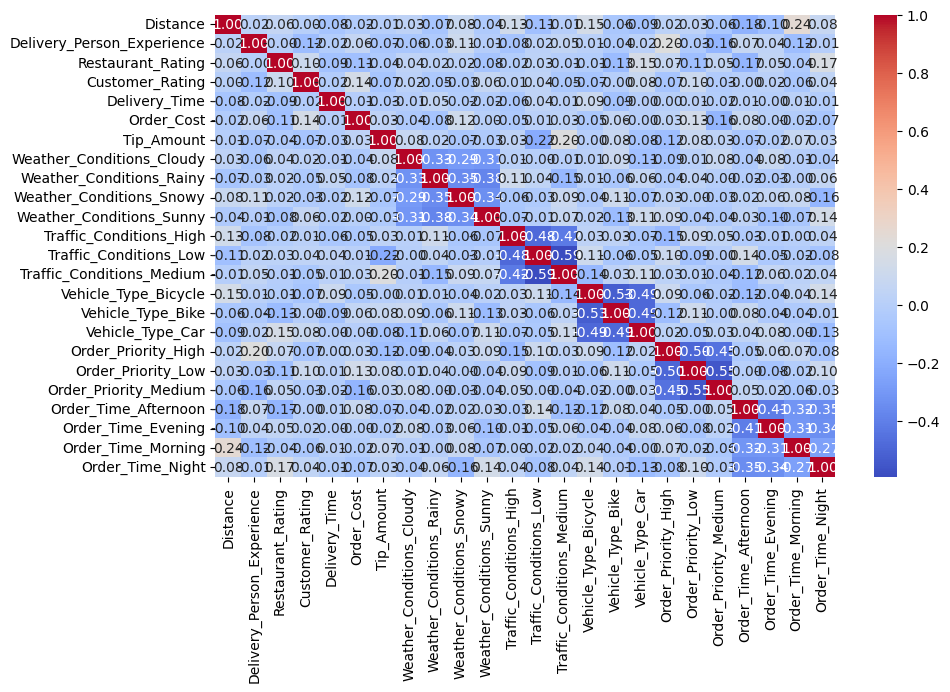

Delivery_Time                 1.000000
Vehicle_Type_Bicycle          0.093194
Weather_Conditions_Rainy      0.054402
Traffic_Conditions_Low        0.039714
Order_Priority_Low            0.012849
Order_Time_Morning            0.011984
Traffic_Conditions_Medium     0.011810
Order_Time_Afternoon          0.006363
Order_Priority_High           0.004804
Vehicle_Type_Car             -0.001372
Order_Time_Evening           -0.004021
Order_Cost                   -0.009307
Weather_Conditions_Cloudy    -0.012272
Order_Time_Night             -0.013972
Order_Priority_Medium        -0.017798
Delivery_Person_Experience   -0.019098
Weather_Conditions_Sunny     -0.020492
Customer_Rating              -0.021952
Weather_Conditions_Snowy     -0.024621
Tip_Amount                   -0.029154
Traffic_Conditions_High      -0.057563
Distance                     -0.075143
Restaurant_Rating            -0.091855
Vehicle_Type_Bike            -0.091859
Name: Delivery_Time, dtype: float64


In [42]:

corr = data.iloc[:,3:].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Correlation with Delivery_Time
print(corr["Delivery_Time"].sort_values(ascending=False))

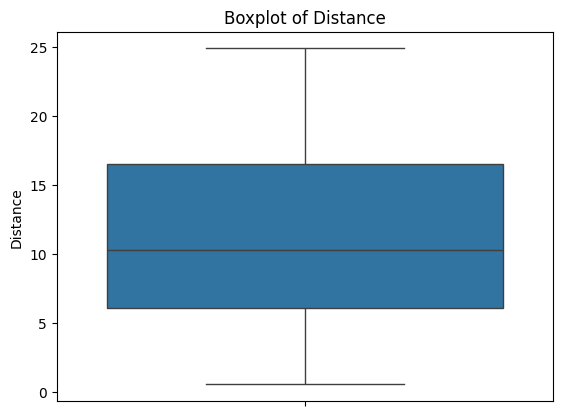

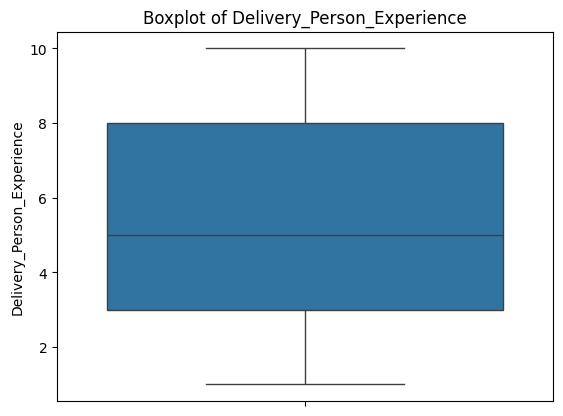

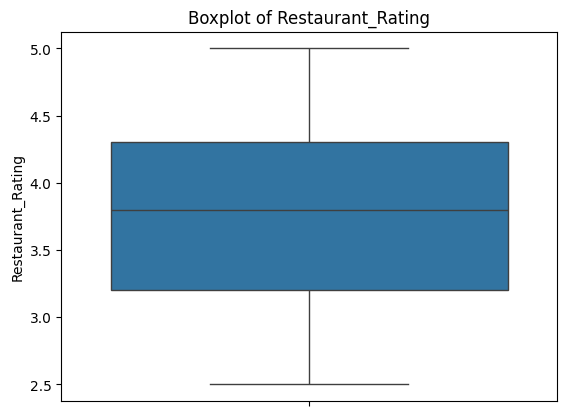

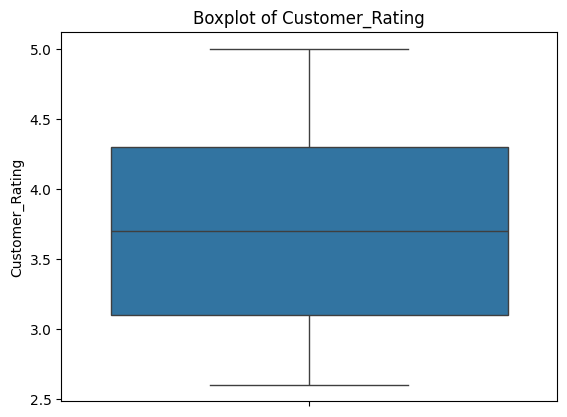

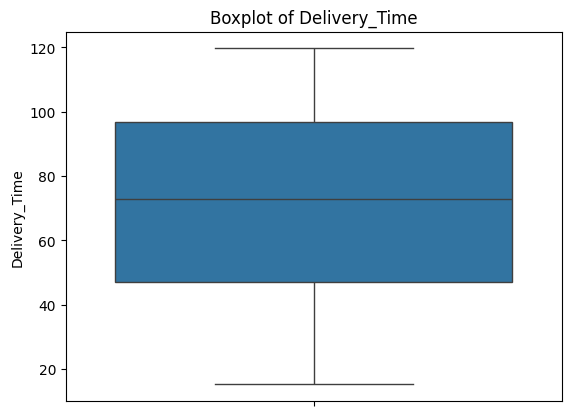

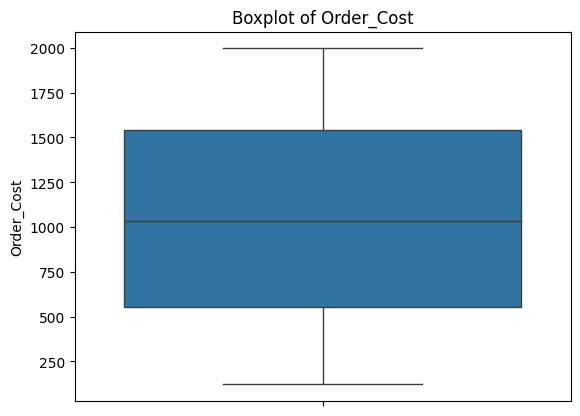

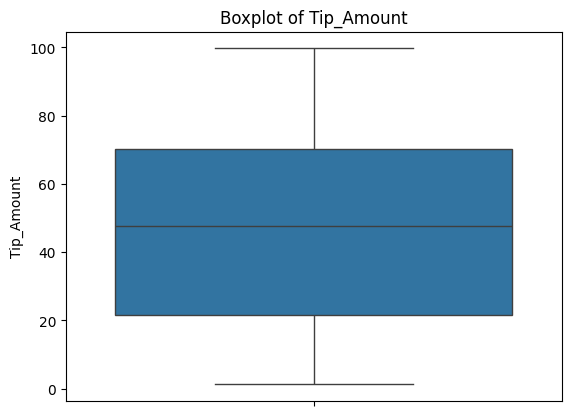

In [43]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
for cols in numeric_cols:
    plt.figure()
    sns.boxplot(data[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

In [44]:
data[["cust_lat", "cust_lon"]] = data["Customer_Location"].str.extract(r"\(([^,]+),\s*([^)]+)\)")
data[["rest_lat", "rest_lon"]] = data["Restaurant_Location"].str.extract(r"\(([^,]+),\s*([^)]+)\)")
data = data.drop(columns=["Customer_Location", "Restaurant_Location"])
data.head()


,Order_ID,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,...,Order_Priority_Low,Order_Priority_Medium,Order_Time_Afternoon,Order_Time_Evening,Order_Time_Morning,Order_Time_Night,cust_lat,cust_lon,rest_lat,rest_lon
0,ORD0001,1.57,4,4.1,3.0,26.22,1321.10,81.54,False,True,...,False,True,True,False,False,False,17.030479,79.743077,12.358515,85.100083
1,ORD0002,21.32,8,4.5,4.2,62.61,152.21,29.02,True,False,...,True,False,False,False,False,True,15.398319,86.639122,14.174874,77.025606
2,ORD0003,6.95,9,3.3,3.4,48.43,1644.38,64.17,False,False,...,False,False,False,False,False,True,15.687342,83.888808,19.594748,82.048482
3,ORD0004,13.79,2,3.2,3.7,111.63,541.25,79.23,True,False,...,False,True,False,True,False,False,20.415599,78.046984,16.915906,78.278698
4,ORD0005,6.72,6,3.5,2.8,32.38,619.81,2.34,False,True,...,True,False,False,False,False,True,14.786904,78.706532,15.206038,86.203182


In [45]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    # Convert degrees to radians
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # in kilometers
    return distance

# Apply the function row-wise
data["cust_lat"] = data["cust_lat"].astype(float)
data["cust_lon"] = data["cust_lon"].astype(float)
data["rest_lat"] = data["rest_lat"].astype(float)
data["rest_lon"] = data["rest_lon"].astype(float)

data["distance_km"] = data.apply(
    lambda row: haversine(row["cust_lat"], row["cust_lon"],
                          row["rest_lat"], row["rest_lon"]),
    axis=1
)

data.head()

,Order_ID,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,...,Order_Priority_Medium,Order_Time_Afternoon,Order_Time_Evening,Order_Time_Morning,Order_Time_Night,cust_lat,cust_lon,rest_lat,rest_lon,distance_km
0,ORD0001,1.57,4,4.1,3.0,26.22,1321.10,81.54,False,True,...,True,True,False,False,False,17.030479,79.743077,12.358515,85.100083,775.651198
1,ORD0002,21.32,8,4.5,4.2,62.61,152.21,29.02,True,False,...,False,False,False,False,True,15.398319,86.639122,14.174874,77.025606,1042.385597
2,ORD0003,6.95,9,3.3,3.4,48.43,1644.38,64.17,False,False,...,False,False,False,False,True,15.687342,83.888808,19.594748,82.048482,476.220706
3,ORD0004,13.79,2,3.2,3.7,111.63,541.25,79.23,True,False,...,True,False,True,False,False,20.415599,78.046984,16.915906,78.278698,389.912629
4,ORD0005,6.72,6,3.5,2.8,32.38,619.81,2.34,False,True,...,False,False,False,False,True,14.786904,78.706532,15.206038,86.203182,806.505886


In [46]:
df = pd.DataFrame(data)

# Define rush hours (e.g., morning and evening)
df['rush_hour'] = df['Order_Time_Morning'] | df['Order_Time_Evening']  # True if either morning or evening, else False
df.head()

,Order_ID,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,...,Order_Time_Afternoon,Order_Time_Evening,Order_Time_Morning,Order_Time_Night,cust_lat,cust_lon,rest_lat,rest_lon,distance_km,rush_hour
0,ORD0001,1.57,4,4.1,3.0,26.22,1321.10,81.54,False,True,...,True,False,False,False,17.030479,79.743077,12.358515,85.100083,775.651198,False
1,ORD0002,21.32,8,4.5,4.2,62.61,152.21,29.02,True,False,...,False,False,False,True,15.398319,86.639122,14.174874,77.025606,1042.385597,False
2,ORD0003,6.95,9,3.3,3.4,48.43,1644.38,64.17,False,False,...,False,False,False,True,15.687342,83.888808,19.594748,82.048482,476.220706,False
3,ORD0004,13.79,2,3.2,3.7,111.63,541.25,79.23,True,False,...,False,True,False,False,20.415599,78.046984,16.915906,78.278698,389.912629,True
4,ORD0005,6.72,6,3.5,2.8,32.38,619.81,2.34,False,True,...,False,False,False,True,14.786904,78.706532,15.206038,86.203182,806.505886,False


In [63]:


# Features and target
X = data[['distance_km']]
y = data['Delivery_Time']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 856.80
Mean Absolute Error (MAE): 24.57
R-squared (R²): 0.07


In [48]:
print(data['Delivery_Time'])

0       26.22
1       62.61
2       48.43
3      111.63
4       32.38
        ...  
195     50.39
196     90.54
197     73.20
198     53.94
199     78.58
Name: Delivery_Time, Length: 200, dtype: float64


In [49]:
import pandas as pd

# Convert continuous delivery times into 3 classes
data['Delivery_Class'] = pd.qcut(
    data['Delivery_Time'],
    q=3,          # number of bins
    labels=[0,1,2]
)

# Check results
print(data[['Delivery_Time', 'Delivery_Class']].head(10))
print(data['Delivery_Class'].value_counts())



   Delivery_Time Delivery_Class
0          26.22              0
1          62.61              1
2          48.43              0
3         111.63              2
4          32.38              0
5          60.72              1
6          28.76              0
7          57.28              0
8          47.22              0
9          81.55              1
Delivery_Class
0    67
2    67
1    66
Name: count, dtype: int64


In [59]:
data['Delivery_Class'] = pd.qcut(data['Delivery_Time'], q=3, labels=[0,1,2])


X = data[['distance_km', 'Traffic_Conditions_High', 'Order_Priority_High']]
y = data['Delivery_Class']  # the new categorical target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




# If binary classification


# If multiclass classification

print(y_pred)
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


[0.88 0.67 1.61 0.61 0.78 0.96 0.68 0.32 0.9  0.52 1.43 1.28 0.37 1.07
 0.94 1.19 0.7  1.44 0.64 1.22 1.05 0.34 0.82 0.84 0.73 0.73 1.73 1.28
 1.61 0.69 0.65 0.72 0.62 0.52 0.4  1.7  1.71 0.65 1.08 1.43]
MSE: 0.9020825
R²: -0.33765708989805376
